<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
netflix = pd.read_csv("../Datos/netflix_merged.csv")

#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

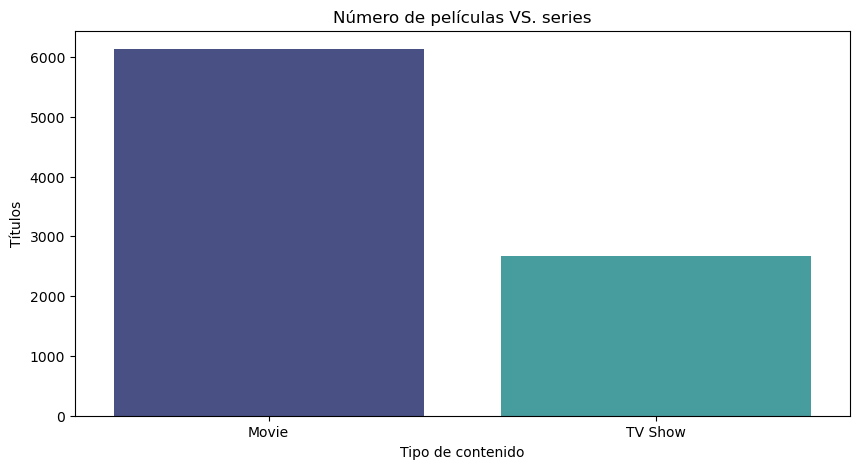

In [161]:
plt.figure(figsize=(10,5))
plt.title("Número de películas VS. series")
sns.countplot(data=netflix, 
            x="type",
            palette="mako")
plt.ylabel("Títulos")
plt.xlabel("Tipo de contenido")
plt.show()

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



In [162]:
order = netflix.groupby("rating")["show_id"].count().sort_values(ascending=False).index

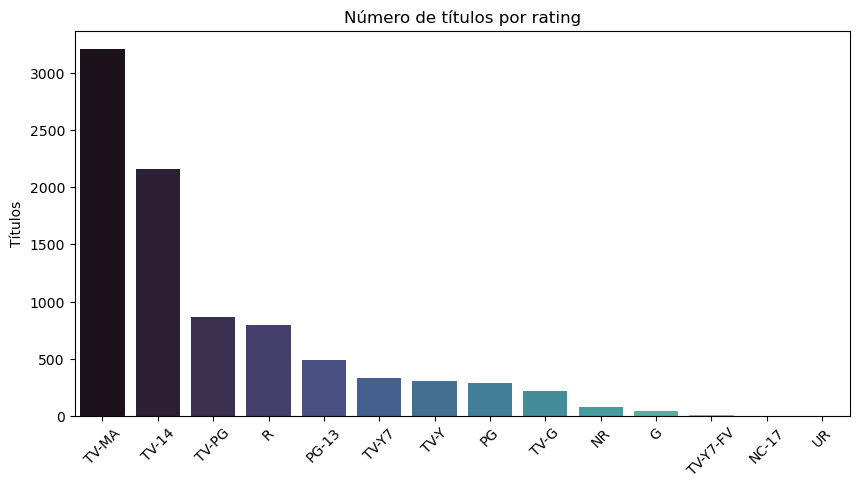

In [163]:
plt.figure(figsize=(10,5))
plt.title("Número de títulos por rating")
sns.countplot(data=netflix, 
            x="rating",
            palette="mako",
            order=order)
plt.ylabel("Títulos")
plt.xlabel(None)
plt.xticks(rotation=45)
plt.show()

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



In [164]:
netflix_countries = netflix[["country"]].value_counts()[:10].reset_index()

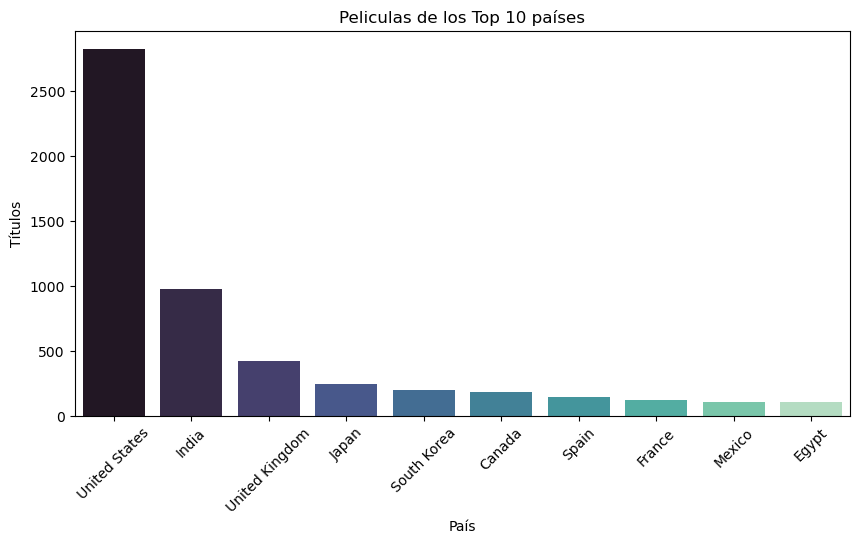

In [165]:
plt.figure(figsize=(10,5))
plt.title("Peliculas de los Top 10 países")
sns.barplot(data=netflix_countries, 
            x="country",
            y="count",
            palette="mako")
plt.ylabel("Títulos")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.show()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

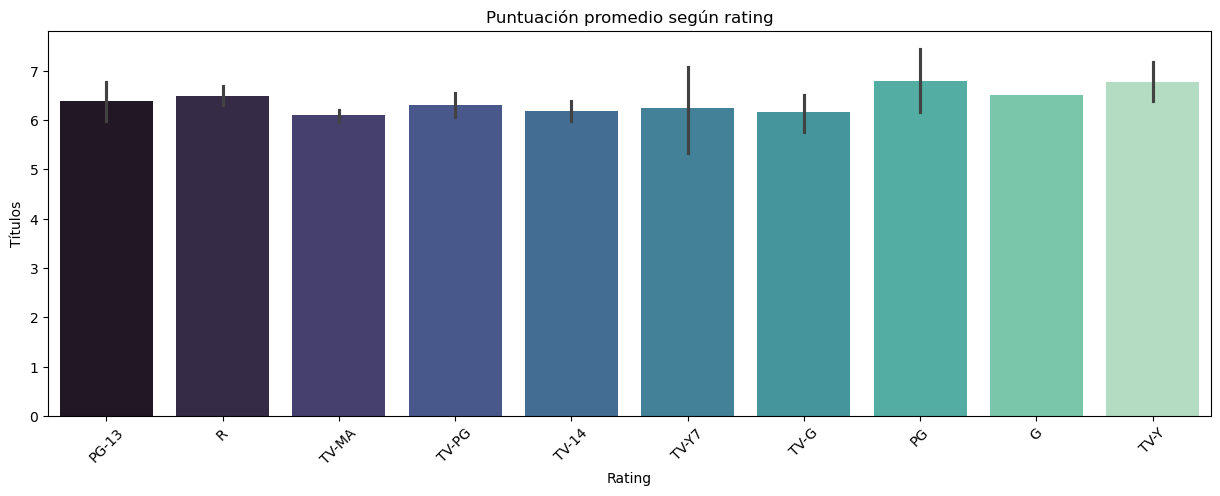

In [166]:
plt.figure(figsize=(15,5))
plt.title("Puntuación promedio según rating")
sns.barplot(data=netflix[~netflix["IMDB Score"].isna()], 
            x="rating",
            y="IMDB Score",
            palette="mako")
plt.ylabel("Títulos")
plt.xlabel("Rating")
plt.xticks(rotation=45)
plt.show()

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


In [167]:
import numpy as np

In [168]:
netflix["duration_min"] = np.where(netflix["duration"].str.endswith(" min"), netflix["duration"].str.replace(" min",""),np.nan).astype(float)

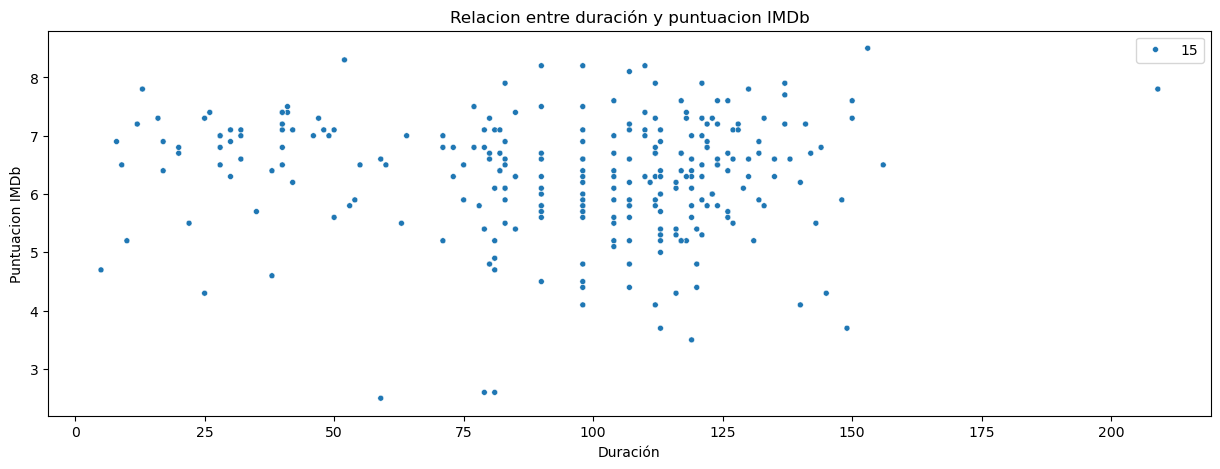

In [169]:
filtro_imdb = ~netflix["IMDB Score"].isna()
netflix_filtrado = netflix[filtro_imdb]

plt.figure(figsize=(15,5))
plt.title("Relacion entre duración y puntuacion IMDb")
sns.scatterplot(data=netflix_filtrado, 
            x="duration_min",
            y="IMDB Score",
            palette="mako",
            size=15)
plt.ylabel("Puntuacion IMDb")
plt.xlabel("Duración")
plt.show()

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

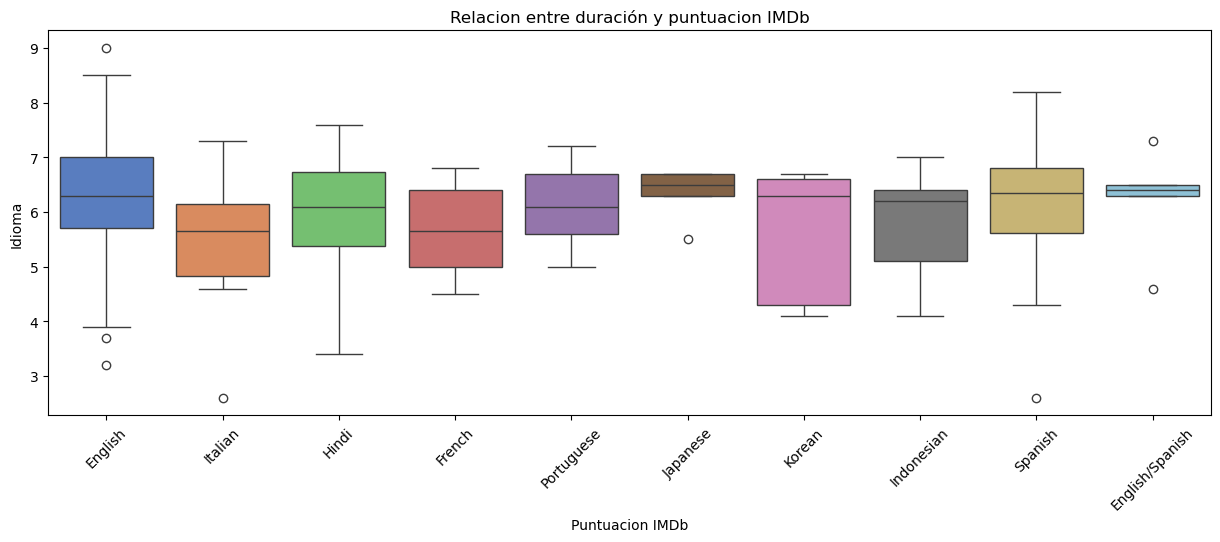

In [170]:
filtro_imdb = ~netflix["IMDB Score"].isna()
top_10_idiomas = list(netflix.Language.value_counts()[:10].index)
filtro_top_paises = netflix["Language"].isin(top_10_idiomas)
netflix_filtrado = netflix[filtro_imdb & filtro_top_paises]

plt.figure(figsize=(15,5))
plt.title("Relacion entre duración y puntuacion IMDb")
sns.boxplot(data=netflix_filtrado, 
            y="IMDB Score",
            x="Language",
            palette="muted")
plt.ylabel("Idioma")
plt.xlabel("Puntuacion IMDb")
plt.xticks(rotation=45)
plt.show()

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



In [171]:
netflix_exploded_directores = netflix.copy()
netflix_exploded_directores["director"] = netflix["director"].str.split(", ")
netflix_exploded_directores = netflix_exploded_directores.explode("director")

In [172]:
top_10_directores = netflix_exploded_directores.groupby("director")[["IMDB Score"]].mean().sort_values(by="IMDB Score",ascending=False)[:10]
top_10_directores

,IMDB Score
director,
Alastair Fothergill,9.0
Keith Scholey,9.0
Jonnie Hughes,9.0
Thom Zimny,8.5
Evgeny Afineevsky,8.4
Jon Alpert,8.3
Huw Cordey,8.3
Carlos Pérez Osorio,8.2
Sergio Pablos,8.2


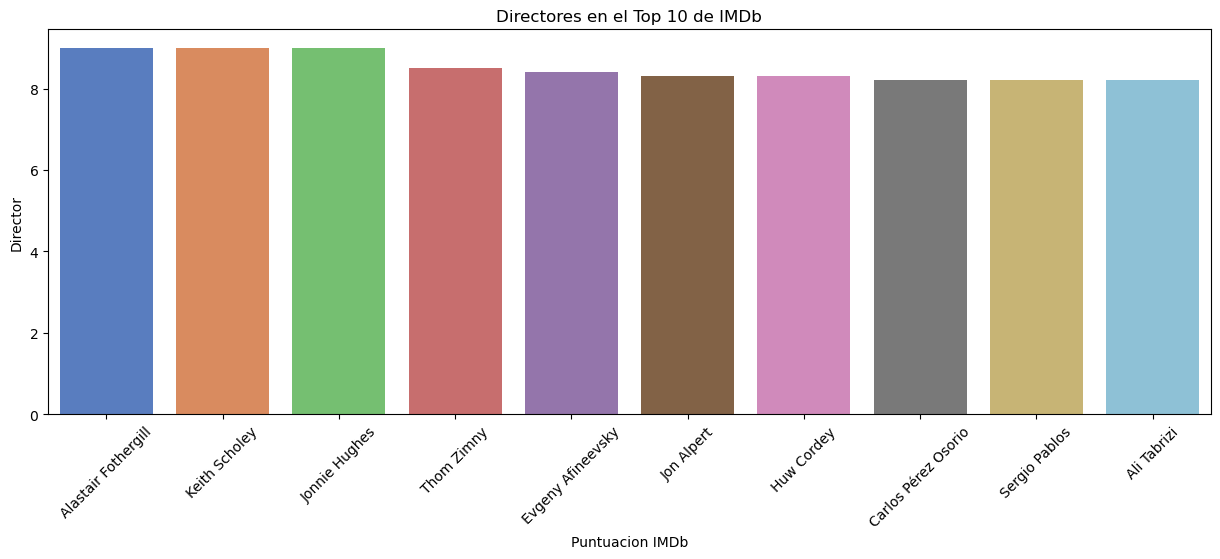

In [173]:
plt.figure(figsize=(15,5))
plt.title("Directores en el Top 10 de IMDb")
sns.barplot(data=top_10_directores, 
            x="director",
            y="IMDB Score",
            palette="muted")
plt.ylabel("Director")
plt.xlabel("Puntuacion IMDb")
plt.xticks(rotation=45)
plt.show()

#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


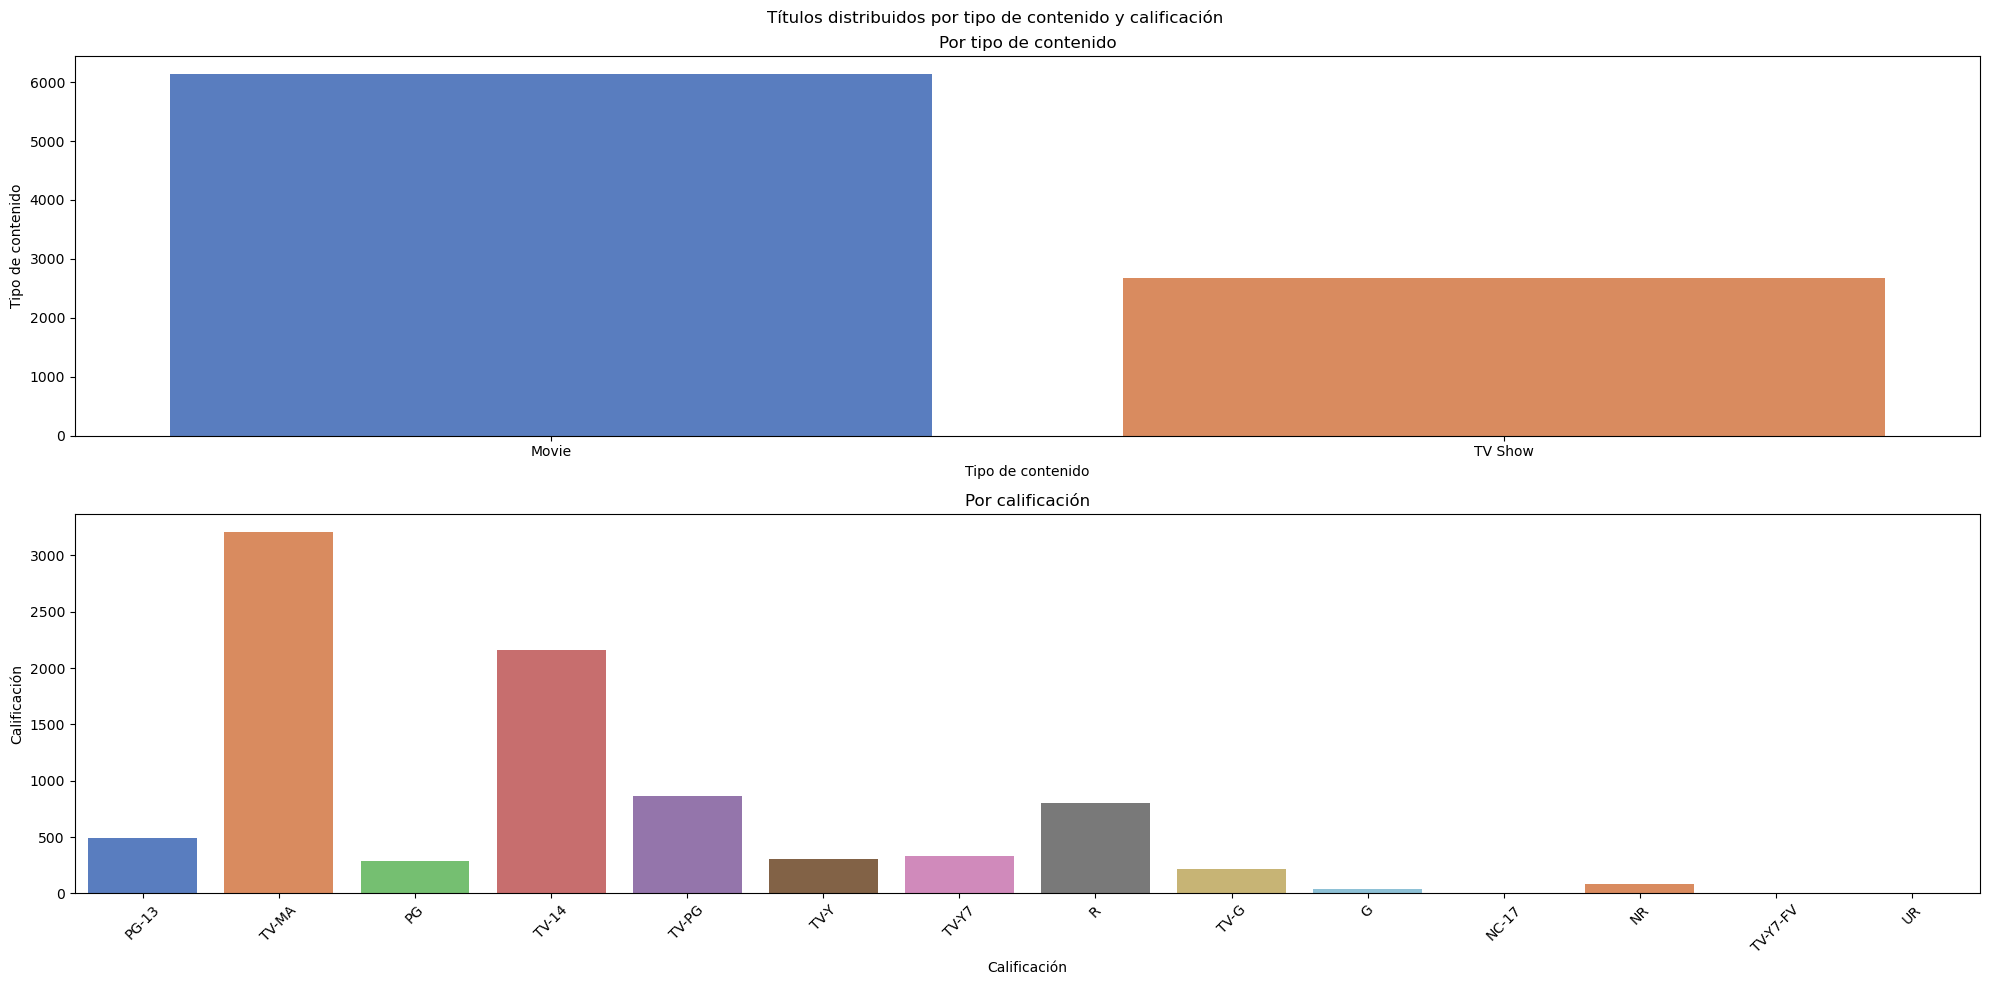

In [174]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

plt.suptitle("Títulos distribuidos por tipo de contenido y calificación")
ax[0].set_title("Por tipo de contenido")
sns.countplot(data=netflix, 
            x="type",
            palette="muted",
            ax=ax[0])
ax[0].set_xlabel("Tipo de contenido")
ax[0].set_ylabel("Tipo de contenido")
# ax[0].tick_params(axis="x",labelrotation=45) No las roto porque no es visualmente necesario


ax[1].set_title("Por calificación")
sns.countplot(data=netflix, 
            x="rating",
            palette="muted",
            ax=ax[1])

ax[1].set_xlabel("Calificación")
ax[1].set_ylabel("Calificación")
ax[1].tick_params(axis="x",labelrotation=45)

plt.tight_layout()
plt.show()

#### Ejercicio 10: ¿Cómo se distribuyen los títulos por país para los 6 principales países? Tienes que crear una gráfica para cada país mostrando los resultados en un subplot. Deberás: 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



In [175]:
import warnings
warnings.filterwarnings("ignore")

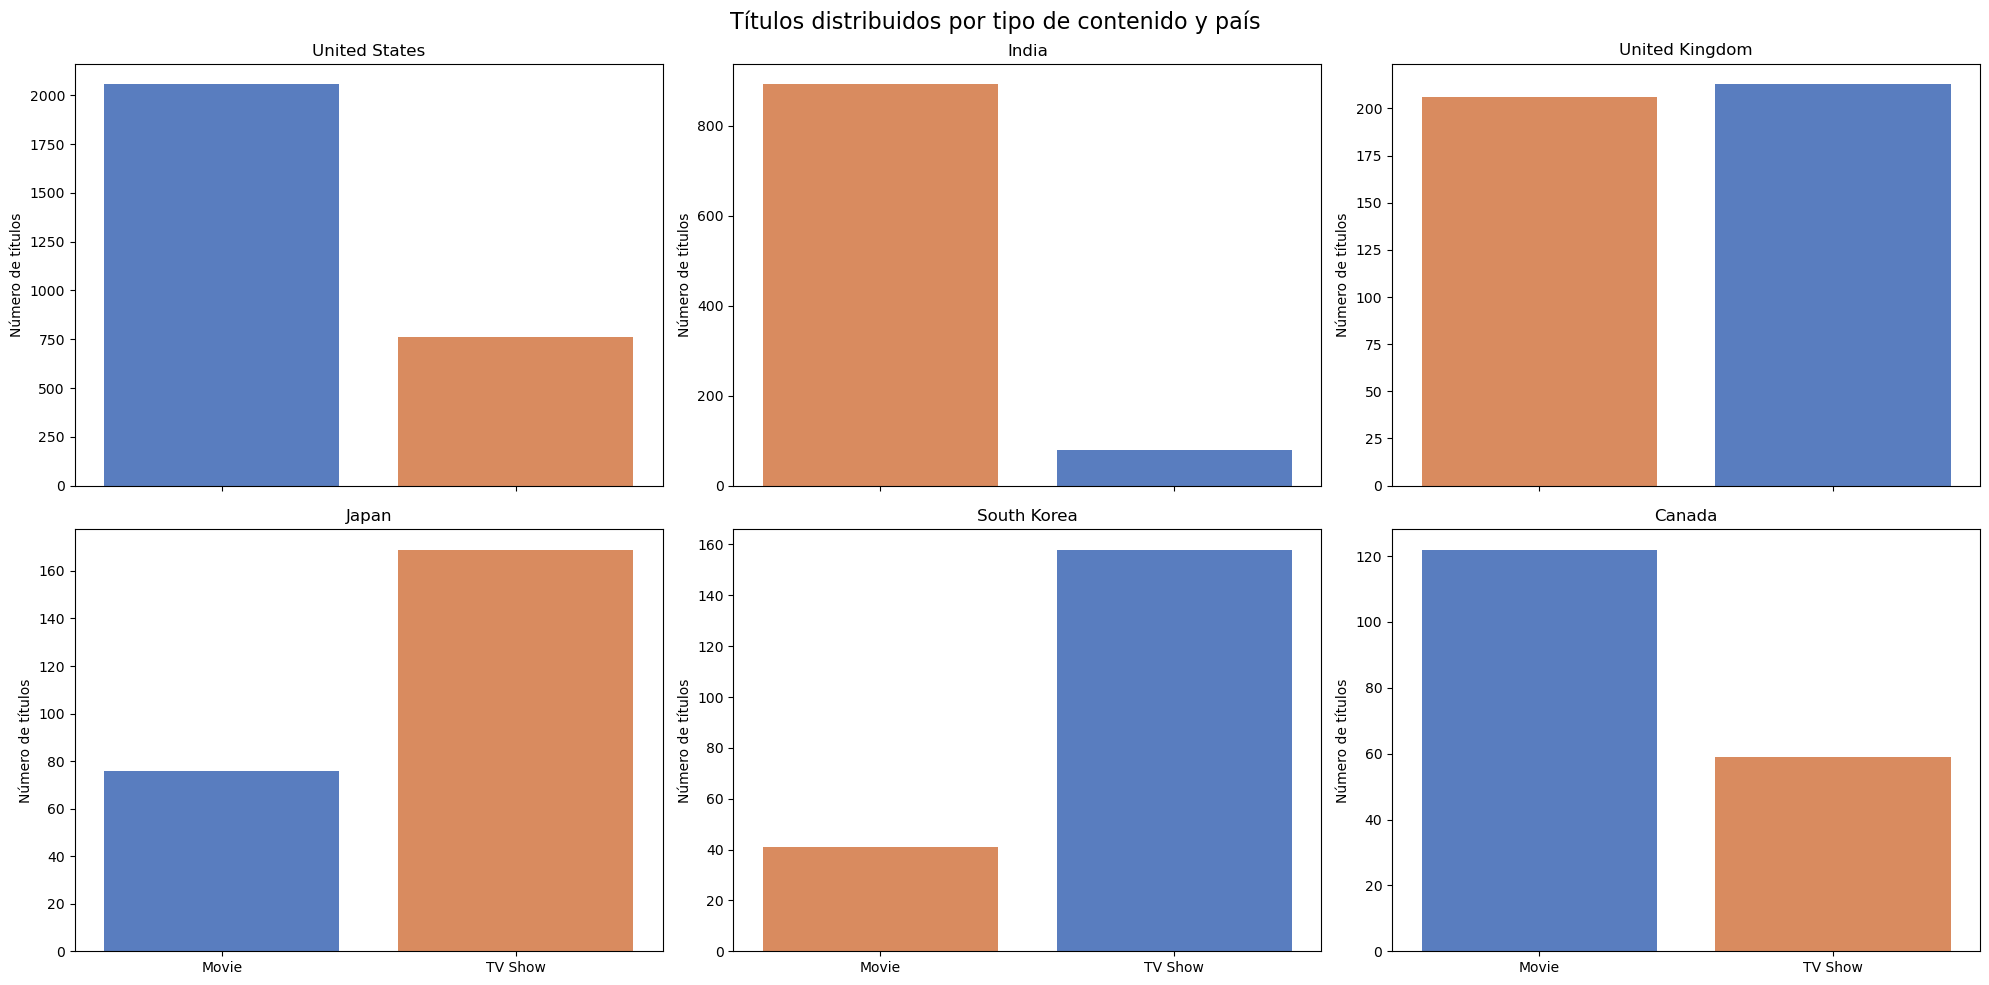

In [176]:
fig, ax = plt.subplots(2,3,figsize=(20,10),sharex=True)
ax = ax.flat

plt.suptitle("Títulos distribuidos por tipo de contenido y país", fontsize=16)

for plot_num, country in enumerate(netflix.country.value_counts()[:6].index):
    ax[plot_num].set_title(country)
    sns.countplot(data=netflix[netflix["country"]==country], 
                x="type",
                palette="muted",
                ax=ax[plot_num])
    ax[plot_num].set_ylabel("Número de títulos")
    ax[plot_num].set_xlabel(None)
    # ax[plot_num].tick_params(axis="x",rotation=45) No las roto porque no es necesario visualmente


plt.tight_layout()
plt.show()

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [177]:
cinco_principales_paises = netflix.country.value_counts()[:5].index.to_list()

In [190]:
tipos_contenido_top_paises = netflix[netflix["country"].isin(cinco_principales_paises)].groupby("country").rating.nunique().reset_index().sort_values(by="rating",ascending=False)
tipos_contenido_top_paises

,country,rating
4,United States,14
0,India,11
3,United Kingdom,10
1,Japan,8
2,South Korea,7


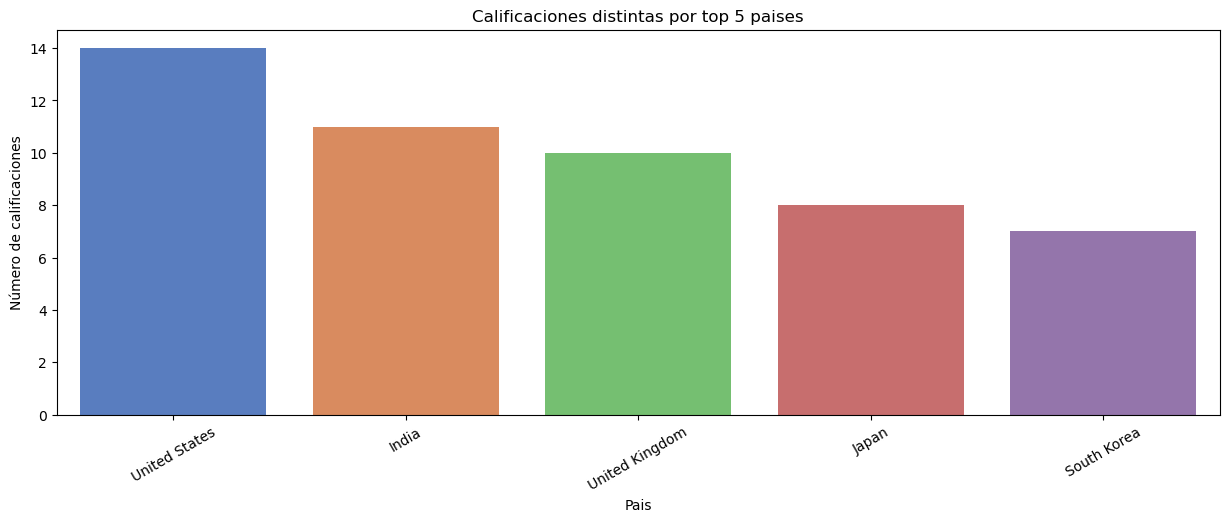

In [191]:
netflix_filtrado = netflix[netflix["country"].isin(cinco_principales_paises)]
plt.figure(figsize=(15,5))
plt.title("Calificaciones distintas por top 5 paises")
sns.barplot(data=tipos_contenido_top_paises, 
            x="country",
            y="rating",
            palette="muted")
plt.ylabel("Número de calificaciones")
plt.xlabel("Pais")
plt.xticks(rotation=30)
plt.show()

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

In [180]:
cinco_principales_calificaciones = netflix.rating.value_counts()[:5].index.to_list()
cinco_principales_calificaciones

['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13']

In [181]:
netflix["year_added"] = pd.to_datetime(netflix["date_added"]).dt.year
netflix["register"] = 1

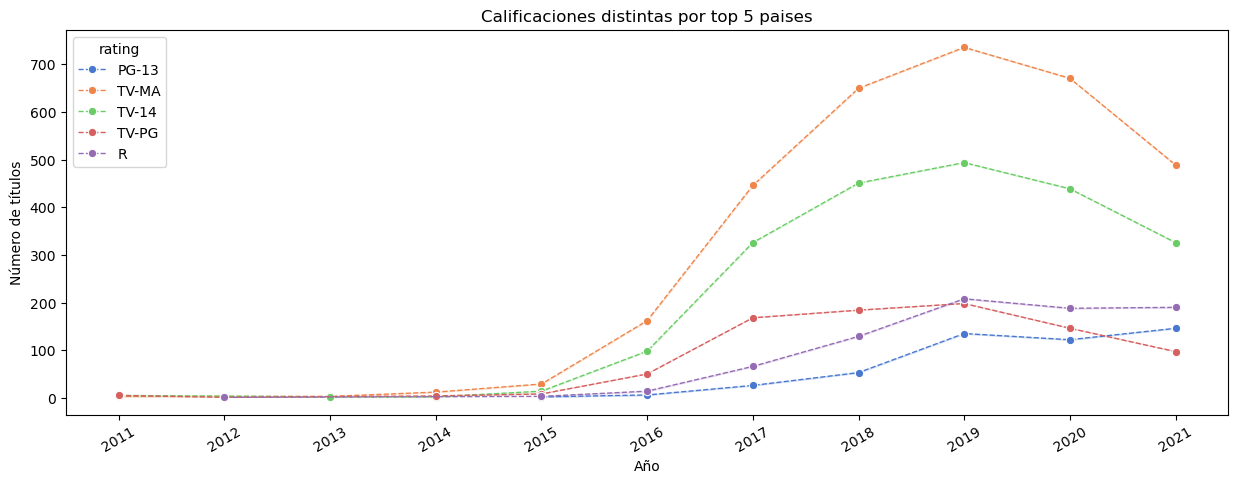

In [182]:
filtro_rating = netflix["rating"].isin(cinco_principales_calificaciones)
anio_max = netflix["year_added"].max()
filtro_años = netflix["year_added"].between(anio_max-10,anio_max,inclusive="both")
netflix_filtrado = netflix[ filtro_rating & filtro_años ]
plt.figure(figsize=(15,5))
plt.title("Calificaciones distintas por top 5 paises")
sns.lineplot(data=netflix_filtrado, 
            x="year_added",
            y="register",
            hue="rating",
            estimator="sum",
            marker="o",
            linewidth = 1,
            linestyle = "dashed",
            palette="muted")
plt.ylabel("Número de títulos")
plt.xlabel("Año")
plt.xticks(ticks=netflix_filtrado["year_added"].unique(),rotation=30)
plt.show()


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

In [187]:
netflix["register"] = 1
anio_max = netflix["year_added"].max()
anio_min = netflix["year_added"].min()
filtro_años = netflix["year_added"].between(anio_min,anio_max,inclusive="both")
netflix_filtrado = netflix[ filtro_rating & filtro_años ]

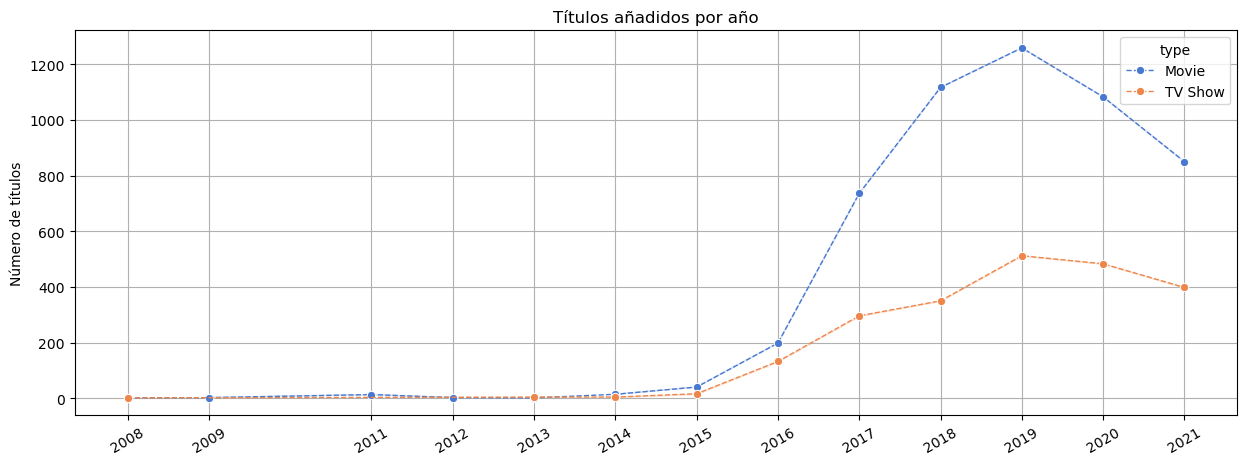

In [188]:
plt.figure(figsize=(15,5))
plt.title("Títulos añadidos por año")
sns.lineplot(data=netflix_filtrado, 
            x="year_added",
            y="register",
            hue="type",
            estimator="sum",
            marker="o",
            linewidth = 1,
            linestyle = "dashed",
            palette="muted")
plt.ylabel("Número de títulos")
plt.xlabel(None)
plt.xticks(ticks=netflix_filtrado["year_added"].unique(),rotation=30)
plt.grid()
plt.show()

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

In [144]:
titulos_calificacion = netflix_filtrado.rating.value_counts()
titulos_calificacion

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

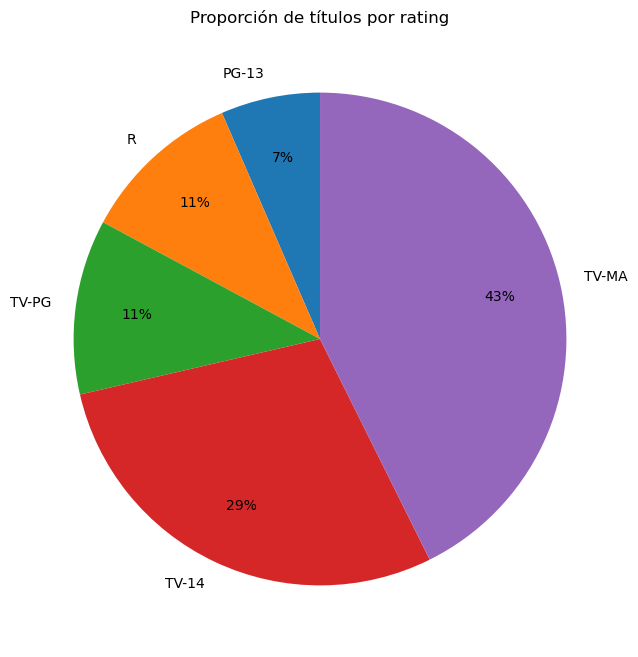

In [148]:
plt.figure(figsize=(8,8))
plt.title("Proporción de títulos por rating")
plt.pie(
    titulos_calificacion[::-1],
    startangle=90,
    pctdistance=0.75,
    labels=titulos_calificacion[::-1].index,
    autopct='%0.f%%'
)
plt.show()

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.

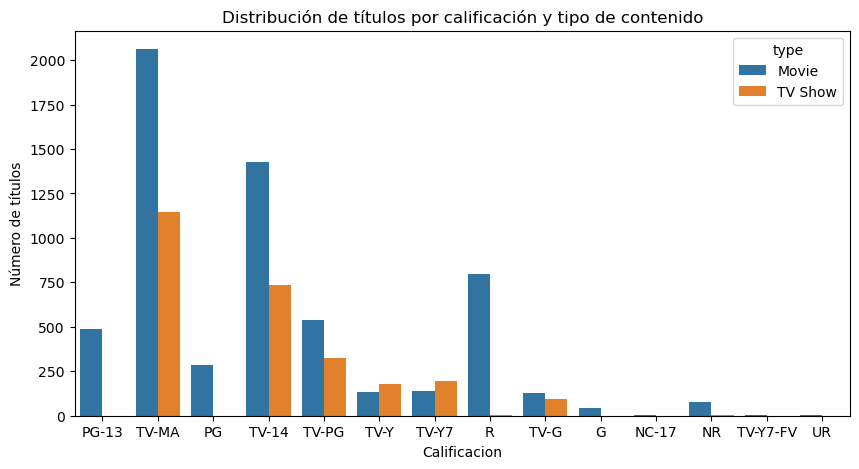

In [150]:
plt.figure(figsize=(10,5))
plt.title("Distribución de títulos por calificación y tipo de contenido")
sns.countplot(data=netflix,
              x="rating",
              hue="type")
plt.ylabel("Número de títulos")
plt.xlabel("Calificacion")
plt.show()